<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística<h1> 
<h3> Análisis y Visualización de Datos - 2019 </h3>

**Integrantes:** Lucía Benitez, Johanna Frau y Sofía Luján

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de identidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [0]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [6]:
seaborn.__version__

'0.9.0'

In [0]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [8]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [9]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [0]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [11]:
dataset[important_cols].head(15)

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.596281,57.0,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,5.281772,147.0,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,6.111324,117.0,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,8.099696,42.0,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,6.912804,84.0,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,9.184438,11.0,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,9.246948,8.0,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,5.676553,131.0,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.454538,64.0,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,6.136070,114.0,7.56,30.0,6.848035,75.0


 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

A. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [12]:
important_cols

['year',
 'ISO_code',
 'countries',
 'region',
 'pf_identity_legal',
 'pf_identity_parental_marriage',
 'pf_identity_parental_divorce',
 'pf_identity_parental',
 'pf_identity_sex_male',
 'pf_identity_sex_female',
 'pf_identity_sex',
 'pf_identity_divorce',
 'pf_identity',
 'pf_score',
 'pf_rank',
 'ef_score',
 'ef_rank',
 'hf_score',
 'hf_rank']

In [0]:
numeric_cols = [col for col in dataset[important_cols]._get_numeric_data()]

# 1. Estadísticos descriptivos

### 1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [14]:
for col in dataset[numeric_cols]:
  max = dataset[col].describe(include='all')['max']
  min = dataset[col].describe(include='all')['min']
  range = max - min
  print('Nombre columna: '+ col+ " -- Max: "+ str(max) + "-- Min: "+ str(min)+ "-- Range: "+ str(range))


Nombre columna: year -- Max: 2016.0-- Min: 2008.0-- Range: 8.0
Nombre columna: pf_identity_legal -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_parental_marriage -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_parental_divorce -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_parental -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_sex_male -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_sex_female -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_sex -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity_divorce -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_identity -- Max: 10.0-- Min: 0.0-- Range: 10.0
Nombre columna: pf_score -- Max: 9.568154233-- Min: 2.16655534-- Range: 7.401598892999999
Nombre columna: pf_rank -- Max: 162.0-- Min: 1.0-- Range: 161.0
Nombre columna: ef_score -- Max: 9.19-- Min: 2.88-- Range: 6.31
Nombre columna: ef_rank -- Max: 162.0-- Min

 ***2. Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?***

***3. ¿Son todos los valores de pf_identity  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?***
 

In [15]:
from collections import Counter

pf_identity_hf_score_cols = [col for col in dataset.columns if 'pf_identity' in col]
pf_identity_hf_score_cols += ['hf_score' ,'ef_score']
data = []

for col in dataset[pf_identity_hf_score_cols]:
    meanWorld = dataset[col].mean()
    stdworld = dataset[col].std()
    medianWorld = dataset[col].median()
    modeWorld = Counter(dataset[col]).most_common(1)[0][0]
    meanLatin = dataset[dataset['region']=='Latin America & the Caribbean'][col].mean()
    stdLatin = dataset[dataset['region']=='Latin America & the Caribbean'][col].std()
    medianlatin = dataset[dataset['region']=='Latin America & the Caribbean'][col].median()
    modeLatin = Counter(dataset[dataset['region']=='Latin America & the Caribbean'][col]).most_common(1)[0][0]
    data.append([meanLatin,stdLatin ,medianlatin, modeLatin,meanWorld,stdworld,medianWorld, modeWorld])
    
    

pandas.DataFrame(data,pf_identity_hf_score_cols, ['Mean Latin', 'Std latin', 'Median Latin', 'Mode Latin','Mean World', 'std World', 'Median World', 'Mode World'])
    

,Mean Latin,Std latin,Median Latin,Mode Latin,Mean World,std World,Median World,Mode World
pf_identity_legal,3.850000,4.817436,0.000000,0.000000,6.307317,3.635095,7.000000,7.00000
pf_identity_parental_marriage,8.933333,2.497426,10.000000,10.000000,7.248104,3.953387,10.000000,10.00000
pf_identity_parental_divorce,9.333333,2.061688,10.000000,10.000000,7.632719,3.689772,10.000000,10.00000
pf_identity_parental,9.282511,1.880677,10.000000,10.000000,7.428203,3.705913,10.000000,10.00000
pf_identity_sex_male,7.974138,4.027957,10.000000,10.000000,6.709091,4.683089,10.000000,10.00000
pf_identity_sex_female,9.224138,2.680977,10.000000,10.000000,7.935414,4.028877,10.000000,10.00000
pf_identity_sex,8.599138,2.993297,10.000000,10.000000,7.325835,4.048606,10.000000,10.00000
pf_identity_divorce,10.000000,0.000000,10.000000,10.000000,7.538462,3.644142,10.000000,10.00000
pf_identity,8.765086,1.711732,10.000000,10.000000,7.334180,3.159473,9.166667,10.00000
hf_score,7.047982,0.608904,7.028045,6.469848,6.993444,1.025811,6.923840,7.56814


**2.-** 

En este dataset,  si bien la libertad personal (Personal freedom, de ahora en más PF) se mide en base a muchas variables, en este estudio solo se considera lo relacionado con Identity y Relationships (pf_identity). A su vez, para calcular la misma se establecen diferentes dependencias entre otras variables como muestra el siguiente esquema:

1. **pf_identity**
  1. *pf_identity_legal*
  2. *pf_identity_parental*
    1. pf_identity_parental_marriage
    2. pf_identity_parental_divorce
  3. *pf_identity_divorce*
  4. *pf_identity_sex*
    1. pf_identity_sex_male
    2.  pf_identity_sex_female
    
Así, se observa por ejemplo que **pf_identity**  depende de *pf_identity_parental* que a su vez  depende de pf_identity_parental_marriage y pf_identity_parental_divorce. 

Debido a este comportamiento entre las variables no tendría sentido calcular una moda de la variable **pf_identity** pero si se podría estudiar la moda de variables independientes (por ejemplo para  pf_identity_sex_male). En caso de calcular esta moda creemos que debería separarse por regiones o países para que la misma sea representativa.


Al igual que en el caso de **pf_identity**, para el hf_score calcular la moda no tiene sentido.


Después de obtener la media, la mediana y la desviación estándar de las variables **pf_identity**  y hf_score en el mundo y Latinoamérica junto con  el caribe, consideramos que *las medidas estadísticas más útiles en este caso serían la media y la desviación estándar*. Si bien observamos que no existe una diferencia significativa en dicha comparación y que incluso la variable pf_identity tiene un mejor promedio y desviación estándar en America Latina que en el mundo, las libertades sexuales y legales tienen un comportamiento antagónico en dicha comparación. Consideramos se debería analizar cada país dentro de América Latina por separado para tener una mejor visualización de la libertad personal.



**3.-** 

Las variables **pf_identity** y pf_score no son directamente comparables porque pf_identity influye al pf_score solo en una fracción del calculo final, donde también se tienen en cuentra otras cinco libertades personales específicas y cuestiones de seguridad y protección. Además la variable hf_score es el promedio entre pf_score y ef_score. 



 **4.-  ¿Cómo pueden sanearse los valores faltantes?**  

En primer lugar, se hizo un análisis de la cantidad de datos faltantes para cada una de las variables estudiadas.

In [16]:
totalCountdata = []
for col in dataset[pf_identity_hf_score_cols]:
    count_world = dataset[col].count()
    total_world = len(dataset[col])
    nulos_world = total_world - count_world
    count_lat = dataset[dataset['region']=='Latin America & the Caribbean'][col].count()
    total_lat = len(dataset[dataset['region']=='Latin America & the Caribbean'][col])
    nulos_lat = total_lat - count_lat
    totalCountdata.append([count_world,nulos_world, total_world, count_lat, nulos_lat, total_lat])
    
    
    

pandas.DataFrame(totalCountdata,pf_identity_hf_score_cols, ['No Nulos','Nulos','Total', 'No Nulos LAT','Nulos LAT','Total LAT'])

,No Nulos,Nulos,Total,No Nulos LAT,Nulos LAT,Total LAT
pf_identity_legal,205,1253,1458,40,194,234
pf_identity_parental_marriage,923,535,1458,150,84,234
pf_identity_parental_divorce,923,535,1458,150,84,234
pf_identity_parental,1358,100,1458,223,11,234
pf_identity_sex_male,1375,83,1458,232,2,234
pf_identity_sex_female,1378,80,1458,232,2,234
pf_identity_sex,1378,80,1458,232,2,234
pf_identity_divorce,585,873,1458,84,150,234
pf_identity,1378,80,1458,232,2,234
hf_score,1378,80,1458,232,2,234


De acuerdo a la tabla anterior , los valores faltantes de las variables pf_identity y hf_score son relativamente pocos comparada la cantidad total, con lo cual a priori podrían ser omitidos. Sin embargo, analizamos el comportamiento de la media y la desviación estándar cuando dichos valores nulos son reemplazados por la media. 

In [17]:
## Analisis de la variable hf_score en el mundo
print("Media sin valores nulos: "+str(dataset['hf_score'].mean()))
print("Std sin valores nulos: "+str(dataset['hf_score'].std()))

print("Media reemplazando valores nulos con la media : "+str(dataset['hf_score'].replace(numpy.nan, dataset['hf_score'].mean()).mean()))
print("Std reemplazando valores nulos con la media: "+str(dataset['hf_score'].replace(numpy.nan, dataset['hf_score'].mean()).std()))




Media sin valores nulos: 6.9934437555145
Std sin valores nulos: 1.0258111611874141
Media reemplazando valores nulos con la media : 6.993443755514512
Std reemplazando valores nulos con la media: 0.9972513072444645


In [18]:
## Analisis de la variable pf_identity en el mundo
print("Media sin valores nulos: "+str(dataset['pf_identity'].mean()))
print("Std sin valores nulos: "+str(dataset['pf_identity'].std()))

print("Media replazando valores nulos con la media : "+str(dataset['pf_identity'].replace(numpy.nan, dataset['pf_identity'].mean()).mean()))
print("Std replazando valores nulos con la media: "+str(dataset['pf_identity'].replace(numpy.nan, dataset['pf_identity'].mean()).std()))


Media sin valores nulos: 7.33417997096807
Std sin valores nulos: 3.159472661477449
Media replazando valores nulos con la media : 7.334179970968086
Std replazando valores nulos con la media: 3.071509027270081


Los resultados anteriores muestran que la media no varía cuando reemplazamos los valores nulos mientras que la desviación estandar disminuye, tanto para hf_score y pf_identity. Según entendemos el comportamiento de la desviación estándar es esperable porque el conjunto de datos reemplazados es pequeño comparado con la muestra total. Esto refuerza nuestra hipótesis de que los datos faltantes pueden ser omitidos sin que esto afecte de sobremanera el análisis de los datos.

  **5.- ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?**

Para encontrar los outliers graficaremos en primer lugar los histogramas de  las variables hf_score y pf_identity, los cuales se muestran a continuación.

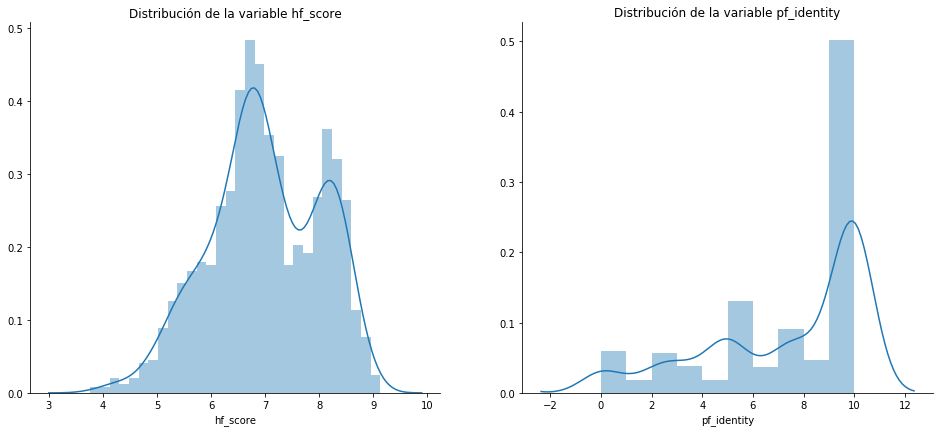

In [19]:
plt.figure(figsize=(25,15))
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(dataset['hf_score'].dropna(), bins=30)
plt.title('Distribución de la variable hf_score')
plt.subplot2grid((2,3),(0,1))
seaborn.distplot(dataset['pf_identity'].dropna(), bins=10)
plt.title('Distribución de la variable pf_identity')
seaborn.despine()



El histograma de la variable **hf_score** pareceria mostrar que los datos se comportan de manera bimodal. Este comportamiento  creemos que tiene sentido si tenemos en cuenta la separación por regiones,  donde países menos desarrollado se encontrarían en el primer pico y países más desarrollados en el segundo pico. Esta hipótesis se comprueba en los siguientes histogramas si consideramos que la siguiente distinción de regiones:

**REGIONES MÁS DESARROLLADAS**
- Oceania
- North America
- Eastern Europe
- Caucasus & Central Asia
- Western Europe

**REGIONES MENOS DESARROLLADAS**
- Latin America & the Caribbean
- Middle East & North Africa
- Sub-Saharan Africa
- South Asia
- East Asia


A simple se puede observar una mayor concentración de datos entre los valores 6 y 7 que corresponde con el primer pico del histograma.  La mayor cantidad de valores de hf_score de America Latina también se encuentran en este rango.

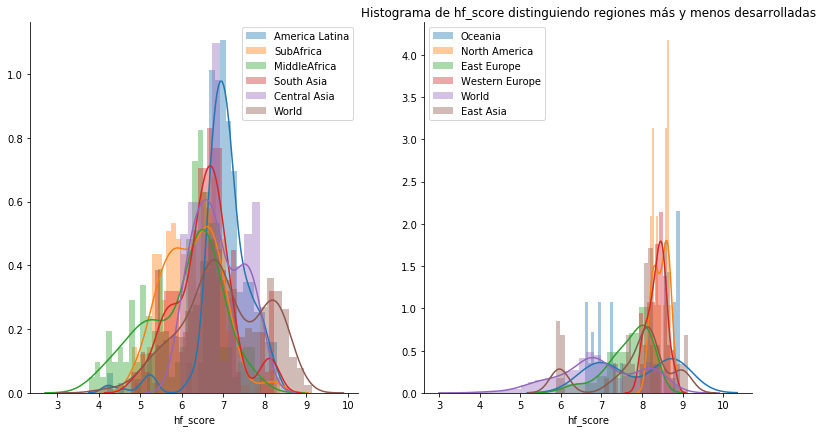

In [20]:


LatinAmerica=dataset[dataset['region']=='Latin America & the Caribbean']['hf_score']
MiddleAfrica=dataset[dataset['region']=='Middle East & North Africa']['hf_score']
SubAfrica=dataset[dataset['region']=='Sub-Saharan Africa']['hf_score']
SouthAsia=dataset[dataset['region']=='South Asia']['hf_score']
EastAsia=dataset[dataset['region']=='East Asia']['hf_score']


Oceania=dataset[dataset['region']=='Oceania']['hf_score']
NorthAmerica=dataset[dataset['region']=='North America']['hf_score']
EastEurope=dataset[dataset['region']=='Eastern Europe']['hf_score']
CentralAsia=dataset[dataset['region']=='Caucasus & Central Asia']['hf_score']
WesternEurope=dataset[dataset['region']=='Western Europe']['hf_score']

plt.figure(figsize=(20,15))


plt.subplot2grid((2,3),(0,0))
seaborn.distplot(LatinAmerica.dropna(), bins=30,label='America Latina')
seaborn.distplot(SubAfrica.dropna(), bins=30,label='SubAfrica')
seaborn.distplot(MiddleAfrica.dropna(), bins=30,label='MiddleAfrica')
seaborn.distplot(SouthAsia.dropna(), bins=30,label='South Asia')
seaborn.distplot(CentralAsia.dropna(), bins=10,label='Central Asia')

seaborn.distplot(dataset['hf_score'].dropna(), bins=30,label='World')
plt.legend()
seaborn.despine()


plt.subplot2grid((2,3),(0,1))
seaborn.distplot(Oceania.dropna(), bins=30,label='Oceania')
seaborn.distplot(NorthAmerica.dropna(), bins=10,label='North America')
seaborn.distplot(EastEurope.dropna(), bins=10,label='East Europe')
seaborn.distplot(WesternEurope.dropna(), bins=10,label='Western Europe')
seaborn.distplot(dataset['hf_score'].dropna(), bins=30,label='World')
seaborn.distplot(EastAsia.dropna(), bins=30,label='East Asia')

plt.legend()
plt.title('Histograma de hf_score distinguiendo regiones más y menos desarrolladas')
seaborn.despine()

A continuación repetimos el análisis anterior para la variable pf_identity. America Latina muestra un índice alto de esta variable que sigue el comportamiento del histograma realizado para todo el mundo. 

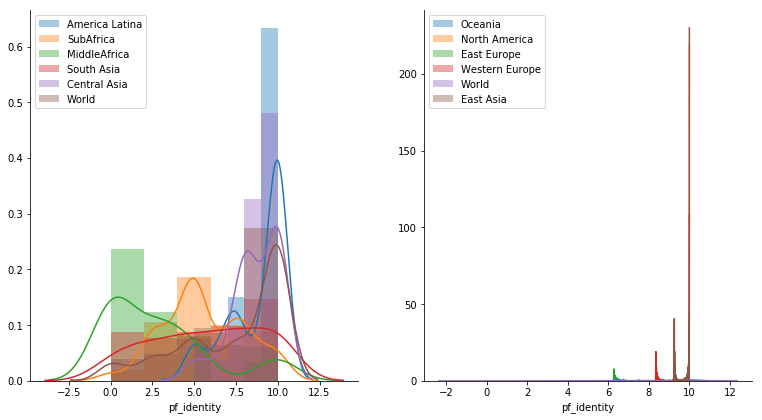

In [21]:
LatinAmerica=dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity']
MiddleAfrica=dataset[dataset['region']=='Middle East & North Africa']['pf_identity']
SubAfrica=dataset[dataset['region']=='Sub-Saharan Africa']['pf_identity']
SouthAsia=dataset[dataset['region']=='South Asia']['pf_identity']
EastAsia=dataset[dataset['region']=='East Asia']['pf_identity']


Oceania=dataset[dataset['region']=='Oceania']['pf_identity']
NorthAmerica=dataset[dataset['region']=='North America']['pf_identity']
EastEurope=dataset[dataset['region']=='Eastern Europe']['pf_identity']
CentralAsia=dataset[dataset['region']=='Caucasus & Central Asia']['pf_identity']
WesternEurope=dataset[dataset['region']=='Western Europe']['pf_identity']

plt.figure(figsize=(20,15))

plt.subplot2grid((2,3),(0,0))
seaborn.distplot(LatinAmerica.dropna(), bins=5,label='America Latina')
seaborn.distplot(SubAfrica.dropna(), bins=5,label='SubAfrica')
seaborn.distplot(MiddleAfrica.dropna(), bins=5,label='MiddleAfrica')
seaborn.distplot(SouthAsia.dropna(), bins=5,label='South Asia')
seaborn.distplot(CentralAsia.dropna(), bins=5,label='Central Asia')

seaborn.distplot(dataset['pf_identity'].dropna(), bins=5,label='World')
plt.legend()
seaborn.despine()


plt.subplot2grid((2,3),(0,1))
seaborn.distplot(Oceania.dropna(), bins=5,label='Oceania')
seaborn.distplot(NorthAmerica.dropna(), bins=5,label='North America')
seaborn.distplot(EastEurope.dropna(), bins=5,label='East Europe')
seaborn.distplot(WesternEurope.dropna(), bins=5,label='Western Europe')
seaborn.distplot(dataset['pf_identity'].dropna(), bins=5,label='World')
seaborn.distplot(EastAsia.dropna(), bins=5,label='East Asia')

plt.legend()
seaborn.despine()

Por otro lado en el histograma de la variable hf_score en todo el mundo se observan posibles outliers para valores entre 3 y 4, lo cual decidimos verificarlo en el siguiente gráfico de caja.




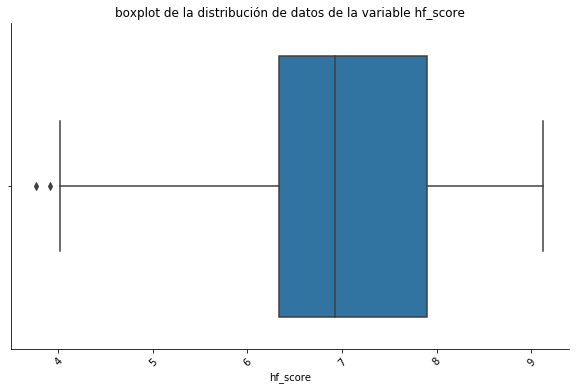

In [22]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x=dataset['hf_score'])
plt.xlabel('hf_score')
plt.xticks(rotation=45)
plt.title('boxplot de la distribución de datos de la variable hf_score')
seaborn.despine()

El histograma de la variable pf_identity muestra una mayor concentración de valores alrededor de 10 y a simple vista no se ven outliers.

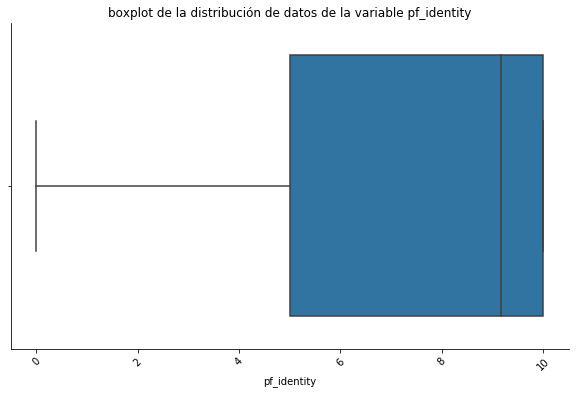

In [23]:
plt.figure(figsize=(10,6))
seaborn.boxplot(x=dataset['pf_identity'])
plt.xlabel('pf_identity')
plt.xticks(rotation=45)
plt.title('boxplot de la distribución de datos de la variable pf_identity')
seaborn.despine()

A continuación mostramos el diagrama de caja de la variable hf_score realizado por regiones. Podemos observar algunos outliers en Eastern Europe, Latin America and the Carribbean y South and East Asia. En principio creemos que los mismos no deberian ser descartados porque estamos hablando de regiones muy amplias que incluyen una gran cantidad de países con diferentes realidades y el histograma general podría mostrar  una distribución distinta para cada país. 



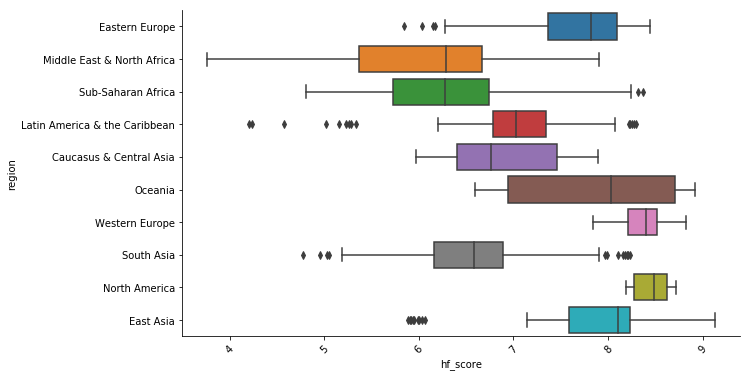

In [24]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='hf_score', y='region')
plt.ylabel('region')
plt.xlabel('hf_score')
plt.xticks(rotation=45)
seaborn.despine()

Como el objetivo del trabajo esta focalizado en estudiar America Latina, nos centraremos en analizar los outliers en los países pertenecientes a esta región excluyendo la región del Caribe. 

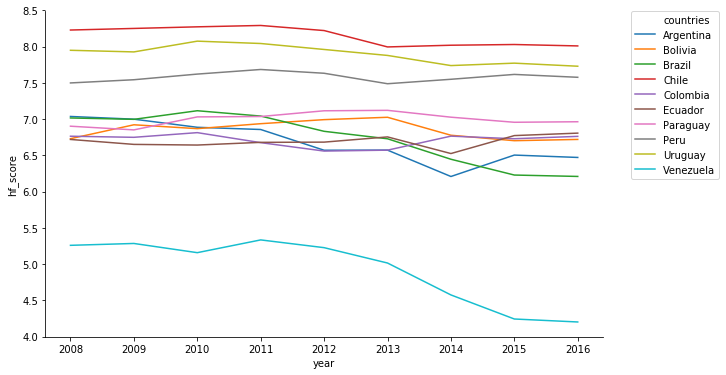

In [25]:
plt.figure(figsize=(10,6))
list_of_countries_latinamerica = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay','Venezuela']
latin_data = dataset[dataset['countries'].isin(list_of_countries_latinamerica)][['hf_score', 'countries','year']]
seaborn.lineplot(data=latin_data, x='year', y='hf_score', hue='countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

En el grafico anterior se puede observar que en la región los valores correspondientes a Venezuela son los outliers inferiores del histograma  y  Chile, Uruguay y Perú los superiores. Consideramos que estos no deben ser eliminados porque representan las realidades de los países. Los outliers de las demás regiones deben sugerir algo similar.

**2. Agregación de datos**

1-. Grafiquen la media de la variable pf_identity y hf_score a través de los años.

2-. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

3-.Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

**RESOLUCIÓN**

1-. Grafiquen la media de la variable pf_identity y hf_score a través de los años.


In [26]:
median_Word=dataset[['pf_identity','hf_score','year', 'region']]
median_Word.groupby('year').mean()

,pf_identity,hf_score
year,,
2008,7.517730,7.069785
2009,7.517730,7.075678
2010,7.303922,7.036396
2011,7.467320,7.031203
2012,7.467320,6.985917
2013,7.364650,6.983139
2014,7.387317,6.958734
2015,7.062893,6.932810
2016,6.976337,6.889871


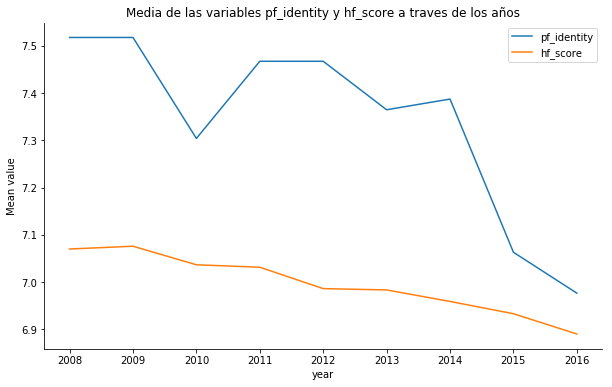

In [27]:
median_Word=dataset[['pf_identity','hf_score','year', 'region']]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Mean value')
ax.set_xlabel('year')
median_Word.groupby('year').mean()['pf_identity'].plot(ax=ax, legend  ='pf_identity')
median_Word.groupby('year').mean()['hf_score'].plot(ax=ax, legend  ='hf_score')
plt.title('Media de las variables pf_identity y hf_score a traves de los años')
seaborn.despine()


**2-.** 

Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones? Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?



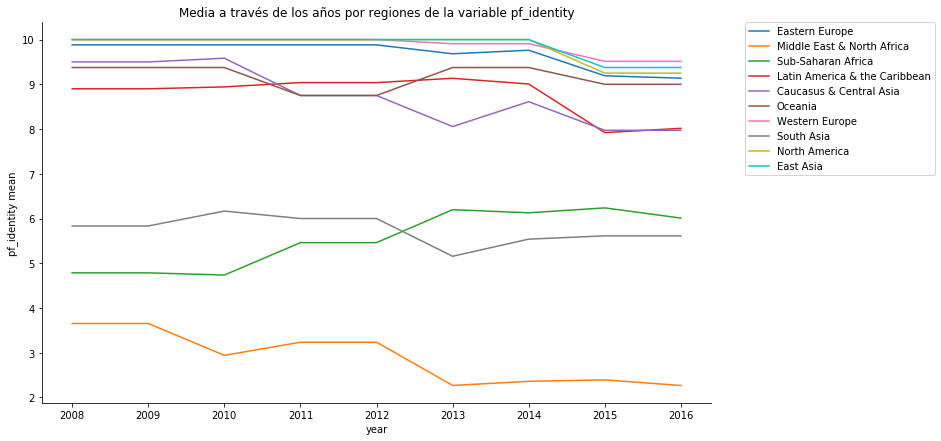

In [28]:
median_Word=dataset[['pf_identity','hf_score','year', 'region']]
fig, ax = plt.subplots(figsize=(12,7))
ax.set_ylabel('pf_identity mean')
ax.set_xlabel('year')
region = ['Eastern Europe', 'Middle East & North Africa','Sub-Saharan Africa', 'Latin America & the Caribbean','Caucasus & Central Asia', 'Oceania', 'Western Europe','South Asia', 'North America', 'East Asia']
for col in region:
  dataset[dataset['region']==col].groupby(['year']).mean()['pf_identity'].plot(ax=ax,legend=True, label=col)
  plt.title('Media a través de los años por regiones de la variable pf_identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()



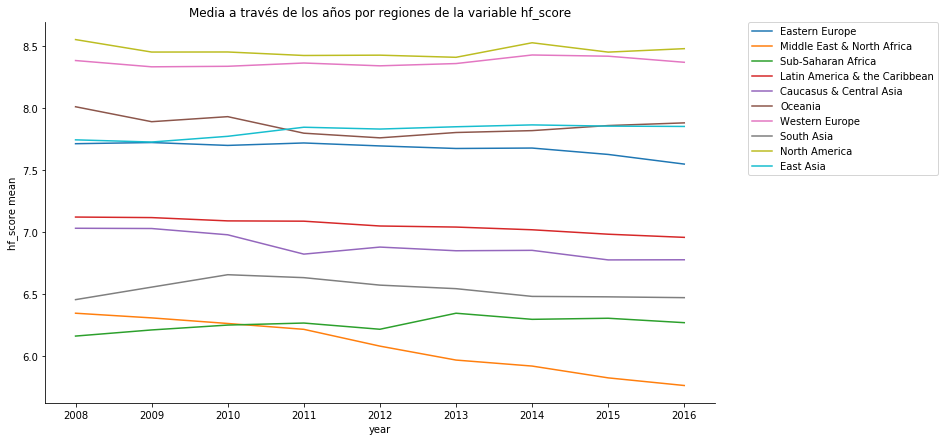

In [29]:
median_Word=dataset[['ef_score','hf_score','year', 'region']]
fig, ax = plt.subplots(figsize=(12,7))
ax.set_ylabel('hf_score mean')
ax.set_xlabel('year')
region = ['Eastern Europe', 'Middle East & North Africa','Sub-Saharan Africa', 'Latin America & the Caribbean','Caucasus & Central Asia', 'Oceania', 'Western Europe','South Asia', 'North America', 'East Asia']
for col in region:
  dataset[dataset['region']==col].groupby(['year']).mean()['hf_score'].plot(ax=ax,legend=True, label=col)
plt.title('Media a través de los años por regiones de la variable hf_score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()
  

La tendencia observada mundialmente no se corresponde con la tendencia observada por regiones de la variable **pf_identity**. Creemos que los conflictos bélicos y la no satisfacción de las necesidades básicas (por ejemplo la escasez de agua) afectan a las libertades personales. Es decir, por ejemplo no podemos hablar de una mejora en las libertades sexuales si las necesidades básicas de supervivencia no están cubiertas. De acuerdo a nuestra investigación existieron una gran cantidad de conflictos en los países comprendidos en la región Middle East and North Africa lo cual afectó significativamente a la tendencia mundial en el 2010.

Por otro lado entre el año 2014 y 2015 notamos una caida abrupta de la variable pf_identity a nivel mundial lo cual si se corresponde con el comportamiento en la mayoría de las regiones. En este intervalo de tiempo ocurrieron muchos acontecimientos mundiales sociales y políticos como por ejemplo la candidatura de Trump, crisis de refugiados sirios, guerra de gaza, caída de aviones con pasajeros, nuevos gobiernos en latinoamerica, etc. En esta franja temporal el comportamiento por regiones se corresponde con el mundial.


En cuanto a la variable **hf_score** vemos que el comportamiento mundial se refleja en el análisis por regiones donde no se observa grandes variaciones en los valores, lo cual es esperable al tratarse de un promedio basado en muchas otras variables. 

**3-** Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

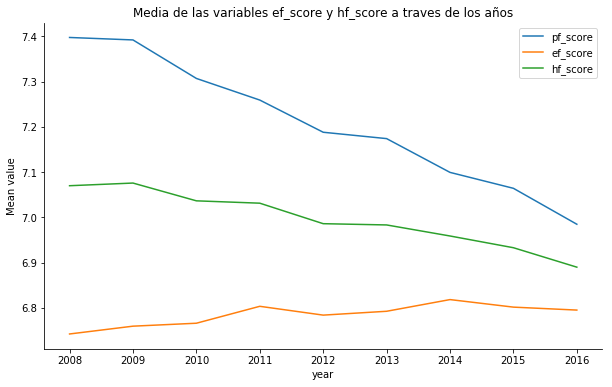

In [30]:
median_Word=dataset[['ef_score','hf_score','year', 'region','pf_score']]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_ylabel('Mean value')
ax.set_xlabel('year')
median_Word.groupby('year').mean()['pf_score'].plot(ax=ax, legend  ='pf_score')
median_Word.groupby('year').mean()['ef_score'].plot(ax=ax, legend  ='ef_score')
median_Word.groupby('year').mean()['hf_score'].plot(ax=ax, legend  ='hf_score')
plt.title('Media de las variables ef_score y hf_score a traves de los años')
seaborn.despine()


Si bien la consigna pide comparar hf_score con ef_score creemos que es interesante visualizar también pf_score ya que hf_score es un promedio de los otros dos. En la grafica se puede observar un crecimiento paulatino de las libertades económicas a nivel mundial lo cual puede estar influencia por la globalización, el capitalismo, la apertura de los mercados y la flexibilización laboral entre otros factores. Se podría pensar que este comportamiento influiria directamente en las libertades humanas sin embargo de acuerdo a la información proporcionada en el dataset las libertades personales son altamente influenciadas por cuestiones políticas como guerras y terrorismo los cuales tienen mucho peso en el cálculo de libertades personales.

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

**1.-**
Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

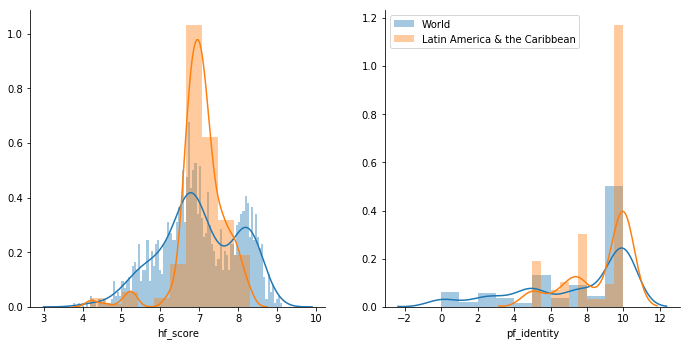

In [31]:
plt.figure(figsize=(18,12))

plt.subplot2grid((2,3),(0,0))

# HUMAN FREEDOM SCORE
seaborn.distplot(dataset['hf_score'].dropna(), bins=100, label='World')
seaborn.distplot(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].dropna(), bins=10, label='Latin America & the Caribbean')
#plt.legend()
seaborn.despine()


plt.subplot2grid((2,3),(0,1))
# HUMAN FREEDOM SCORE
seaborn.distplot(dataset['pf_identity'].dropna(), bins=10, label='World')
seaborn.distplot(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].dropna(), bins=10, label='Latin America & the Caribbean')
plt.legend()
seaborn.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend()
seaborn.despine()






En cuanto a la variable **hf_score** para el mundo pareciera comportarse como una distribución bimodal (como notamos en el punto 1). Sin embargo, para la región de Latinoamerica y el Caribe no podemos sugerir la hipótesis de una distribución normal debido a los outliers que genera Venezuela.

Para **pf_identity** tampoco podemos suponer distribución normal ni para el mundo ni para Latinoamerica pues se observan tres picos significativos, lo cual es más evidente en Latinoamerica.



** 2.-** Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [32]:
# Ktest para la variable pf_identity para Latinoamerica y el mundo
from scipy import stats

print(stats.kstest(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].dropna(),'norm', args=(8.765086	,1.711732)))
print(stats.kstest(dataset['pf_identity'].dropna(),'norm', args=(7.334180	,3.159473)))

KstestResult(statistic=0.3508878458697567, pvalue=4.8165959254690075e-26)
KstestResult(statistic=0.23673606825925608, pvalue=2.000500891418585e-68)


Como los resultados de pvalue pueden ser considerados como cero rechazamos la hipótesis de que las distribuciones sean normales. El siguiente grafico comprueba estos resultados comparando una distribución normal con la distribución de **pf_identity** en el mundo y Latinoamerica.

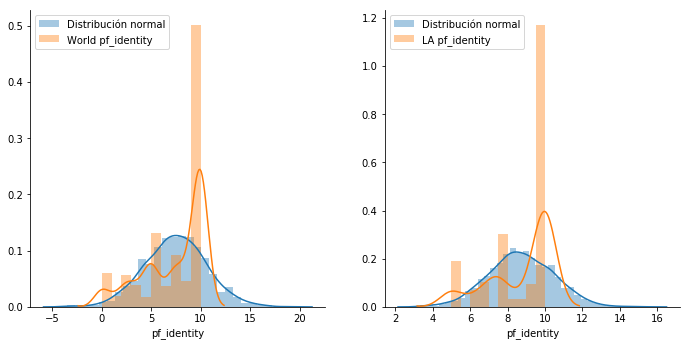

In [70]:
loc_lat, scale_lat = stats.norm.fit(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].dropna())
loc_world, scale_world = stats.norm.fit(dataset['pf_identity'].dropna())
plt.figure(figsize=(18,12))

norm_dist = stats.norm(loc_world, scale_world)
sample = norm_dist.rvs(1000)
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset['pf_identity'].dropna(), bins=10, label='World pf_identity')
plt.legend()
seaborn.despine()

plt.subplot2grid((2,3),(0,1))
norm_dist_lat = stats.norm(loc_lat, scale_lat)
sample_lat = norm_dist_lat.rvs(2500)
seaborn.distplot(sample_lat, label='Distribución normal')
seaborn.distplot(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].dropna(), bins=10, label='LA pf_identity')
plt.legend()
seaborn.despine()

Repetimos el mismo test para la variable hf_score y se observa nuevamente que tampoco se corresponde a una distribución normal.

In [34]:
# Ktest para la variable hf_score para Latinoamerica y el mundo

print(stats.kstest(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].dropna(),'norm', args=(7.047982,0.608904)))
print(stats.kstest(dataset['hf_score'].dropna(),'norm', args=(6.993444,1.025811)))

KstestResult(statistic=0.15047453419341383, pvalue=4.737981330409493e-05)
KstestResult(statistic=0.06597822672195863, pvalue=1.1677983972466635e-05)


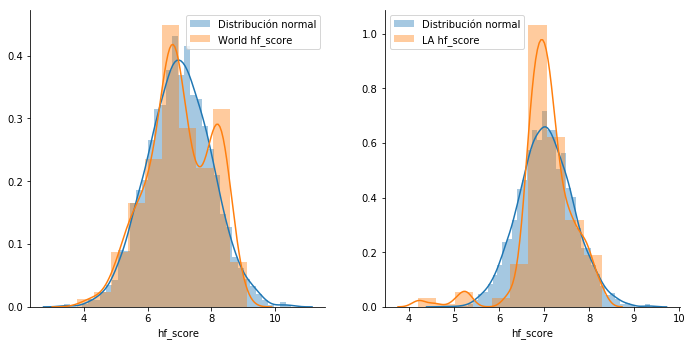

In [68]:
loc_lat, scale_lat = stats.norm.fit(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].dropna())
loc_world, scale_world = stats.norm.fit(dataset['hf_score'].dropna())

plt.figure(figsize=(18,12))

norm_dist = stats.norm(loc_world, scale_world)
sample = norm_dist.rvs(3000)
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset['hf_score'].dropna(), bins=10, label='World hf_score')
plt.legend()
seaborn.despine()

plt.subplot2grid((2,3),(0,1))
norm_dist_lat = stats.norm(loc_lat, scale_lat)
sample_lat = norm_dist_lat.rvs(3000)
seaborn.distplot(sample_lat, label='Distribución normal')
seaborn.distplot(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].dropna(), bins=10, label='LA hf_score')
plt.legend()
seaborn.despine()

**3.-** Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

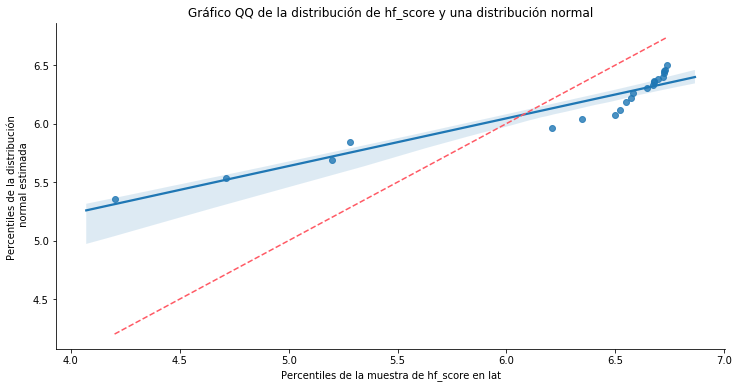

In [51]:
# Grafica QQ de hf_score en latinoamerica
loc, scale = stats.norm.fit(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].dropna())
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
percs = numpy.linspace(0,20,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'])), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score en lat')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

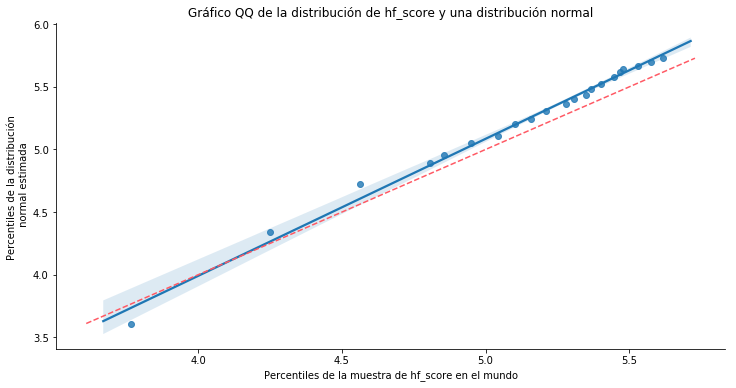

In [65]:
# Grafica QQ de hf_score en el mundo 
loc, scale = stats.norm.fit(dataset['hf_score'].dropna())
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
percs = numpy.linspace(0,10,21)  
qn_sample = numpy.percentile(dataset['hf_score'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset['hf_score'])), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de hf_score en el mundo')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

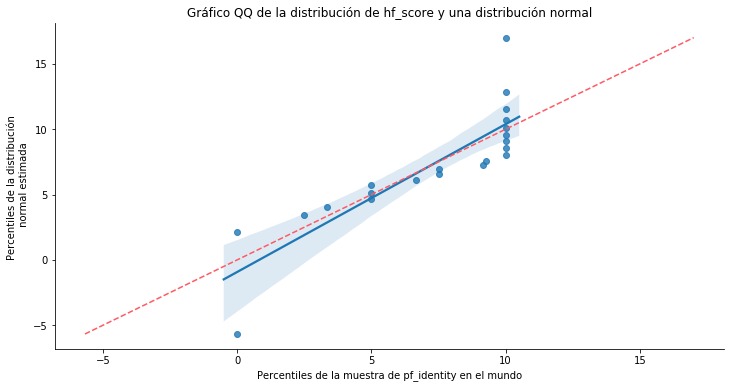

In [55]:
# Grafica QQ de pf_identity en el mundo 
loc, scale = stats.norm.fit(dataset['pf_identity'].dropna())
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset['pf_identity'])), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity en el mundo')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

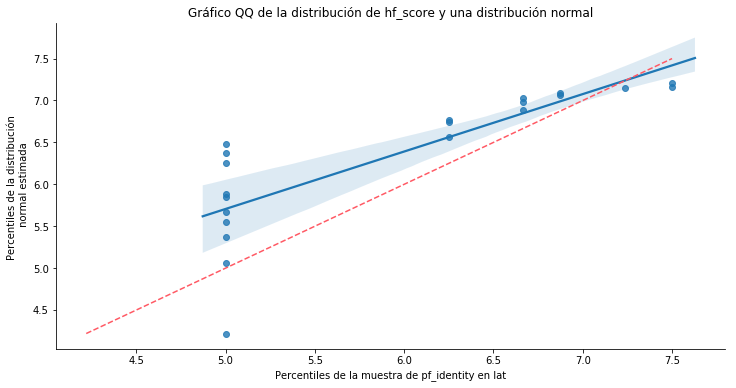

In [56]:
# Grafica QQ de pf_identity en latinoamerica
loc, scale = stats.norm.fit(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].dropna())
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
percs = numpy.linspace(0,20,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'])), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity en lat')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

** 4.-** Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [67]:
print("Asimetria skew de hf_score en Latinoamerica: "+str(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].skew(skipna = True)))
print("Asimetria skew de hf_score en el Mundo: "+str(dataset['hf_score'].skew(skipna = True)))
print("")
print("Asimetria skew de pf_identity en Latinoamerica: "+str(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].skew(skipna = True)))
print("Asimetria skew de pf_identity en el Mundo: "+str(dataset['pf_identity'].skew(skipna = True)))
print("")
print("Curtosis hf_score en Latinoamerica: "+str(dataset[dataset['region']=='Latin America & the Caribbean']['hf_score'].kurtosis()))
print("Curtosis de hf_score en el Mundo: "+str(dataset['hf_score'].kurtosis()))
print("")
print("Curtosis de pf_identity en Latinoamerica: "+str(dataset[dataset['region']=='Latin America & the Caribbean']['pf_identity'].kurtosis()))
print("Curtosisde pf_identity en el Mundo: "+str(dataset['pf_identity'].kurtosis()))

Asimetria skew de hf_score en Latinoamerica: -1.4514937146304978
Asimetria skew de hf_score en el Mundo: -0.2122830516255349

Asimetria skew de pf_identity en Latinoamerica: -1.0546753270192766
Asimetria skew de pf_identity en el Mundo: -0.9131723742750514

Curtosis hf_score en Latinoamerica: 5.483405933943192
Curtosis de hf_score en el Mundo: -0.5076796708042872

Curtosis de pf_identity en Latinoamerica: -0.2754545895278522
Curtosisde pf_identity en el Mundo: -0.4119745543944222


## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 


### 1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


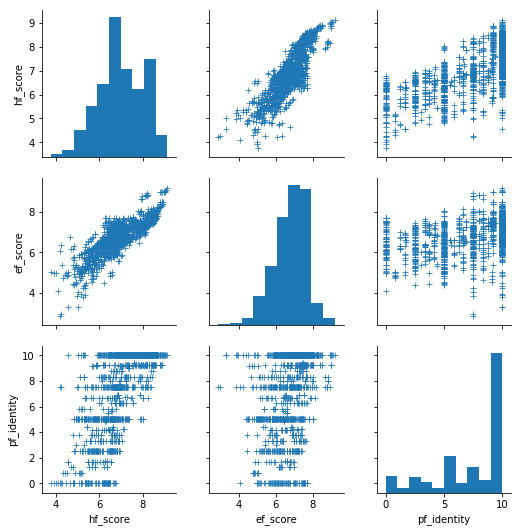

In [39]:
seaborn.pairplot(
    data=dataset,
    vars=['hf_score', 'ef_score', 'pf_identity'],
    
    markers='+')
seaborn.despine()


### 2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

<Figure size 720x432 with 0 Axes>

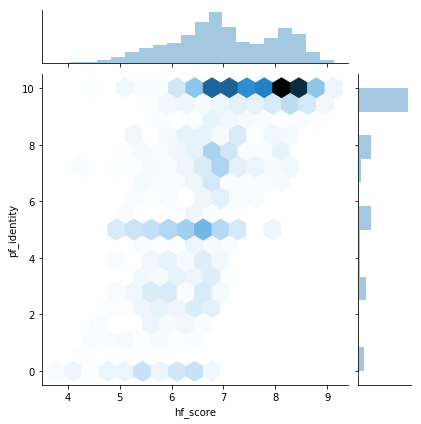

In [40]:
# Correlación entre pf_identity y hf_score;
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset,
                  x='hf_score', y='pf_identity', kind='hex')
seaborn.despine()

<Figure size 720x432 with 0 Axes>

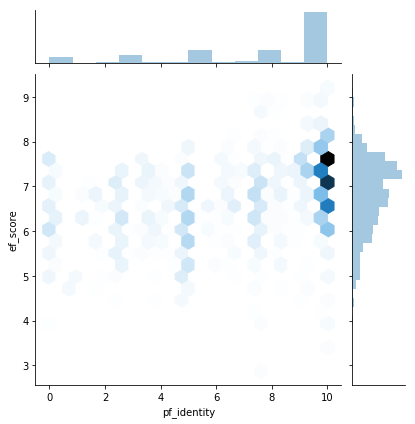

In [41]:
# Correlación entre pf_identity y hf_score;
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset,
                  x='pf_identity', y='ef_score', kind='hex')
seaborn.despine()

<Figure size 720x432 with 0 Axes>

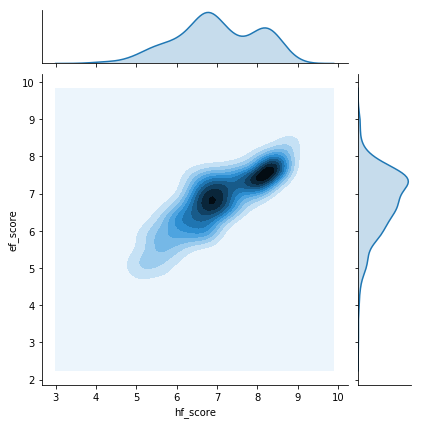

In [42]:
# Correlación entre ef_score y hf_score;
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset,
                  x='hf_score', y='ef_score', kind='kde')
seaborn.despine()

### 3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

In [43]:
#Coeficiente de Pearson 
dataset[['hf_score','ef_score','pf_identity']].corr(method ='pearson')

,hf_score,ef_score,pf_identity
hf_score,1.000000,0.854865,0.677754
ef_score,0.854865,1.000000,0.388877
pf_identity,0.677754,0.388877,1.000000


In [44]:
#Coeficiente de spearman 
dataset[['hf_score','ef_score','pf_identity']].corr(method ='spearman')

,hf_score,ef_score,pf_identity
hf_score,1.000000,0.860647,0.686109
ef_score,0.860647,1.000000,0.426993
pf_identity,0.686109,0.426993,1.000000


In [45]:
#Coeficiente de kendall 
dataset[['hf_score','ef_score','pf_identity']].corr(method ='kendall')

,hf_score,ef_score,pf_identity
hf_score,1.000000,0.681062,0.52131
ef_score,0.681062,1.000000,0.30812
pf_identity,0.521310,0.308120,1.00000


### 4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)
